In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
matches = pd.read_csv('/home/ritik/Desktop/data sci/projects/ipl/dataset/matches.csv')

In [31]:
# dimensions of the dataset
matches.shape

(636, 18)

In [32]:
# checking out the first few rows
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [33]:
matches.info()
# umpire3 column is empty.
# winner column contains 3 null entries which will be dropped as the matches had no results.
# city column consists of 7 null entries ( all matches were played in Dubai).
# umpire1 and umpire2 columns consist of one null entry each.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [34]:
# deleting the redundant columns ( id and umpire3 )
del matches['id']
del matches['toss_decision']
del matches['result']
del matches['dl_applied']
del matches['venue']
del matches['umpire1']
del matches['umpire2']
del matches['umpire3']

In [35]:
# set date as index and sort it so that matches are listed in chronological order
matches.set_index('date', inplace=True)
matches.sort_values('date', ascending = True, inplace = True)

In [36]:
matches.head(2)

,season,city,team1,team2,toss_winner,winner,win_by_runs,win_by_wickets,player_of_match
date,,,,,,,,,
2008-04-18,2008,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,140,0,BB McCullum
2008-04-19,2008,Delhi,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,0,9,MF Maharoof


In [37]:
# replacing NaN city values with Dubai.
matches["city"].fillna("Dubai", inplace = True)

In [41]:
# dropping rows that contain matches with no result.
matches.dropna(axis=0, inplace = True)

In [42]:
matches.info()
# the dataset is cleaned and doesn't contain any null values.

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 2008-04-18 to 2017-05-21
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           633 non-null    int64 
 1   city             633 non-null    object
 2   team1            633 non-null    object
 3   team2            633 non-null    object
 4   toss_winner      633 non-null    object
 5   winner           633 non-null    object
 6   win_by_runs      633 non-null    int64 
 7   win_by_wickets   633 non-null    int64 
 8   player_of_match  633 non-null    object
dtypes: int64(3), object(6)
memory usage: 49.5+ KB


In [43]:
# assigning variables for each team name for easily accessing them.
srh = 'Sunrisers Hyderabad' 
rps = 'Rising Pune Supergiant'
kkr = 'Kolkata Knight Riders'
kxip = 'Kings XI Punjab'
rcb = 'Royal Challengers Bangalore'
mi = 'Mumbai Indians'
dd = 'Delhi Daredevils'
gl = 'Gujarat Lions'
csk = 'Chennai Super Kings'
rr = 'Rajasthan Royals'
dec = 'Deccan Chargers'
pwi = 'Pune Warriors',
ktk = 'Kochi Tuskers Kerala'
rps = 'Rising Pune Supergiants'

In [44]:
# 1. How many seasons do we have in the dataset? How many matches do we have in the dataset?
no_of_seasons = matches['season'].unique()
print(no_of_seasons)
print(len(no_of_seasons))

print(matches['winner'].count())

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
10
633


Text(0.5, 1.0, 'Largest margin of victory by runs')

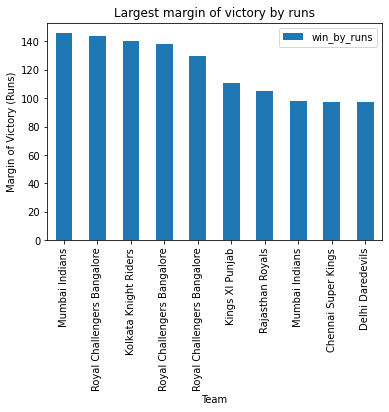

In [51]:
# 2. What are the biggest margins of victory by runs?
# filter top 10 matches with biggest margin of victory by runs
top_win_runs = matches[matches['win_by_runs'] > 0].nlargest(10, 'win_by_runs')
# plotting top 10 matches with biggest margin of victory by runs
top_win_runs.plot.bar(x='winner', y='win_by_runs')
plt.xlabel('Team')
plt.ylabel('Margin of Victory (Runs)')
plt.title('Largest margin of victory by runs')

Text(0.5, 1.0, 'Nail Biters - Matches where margin of victory by runs is small ( between 1-5 )')

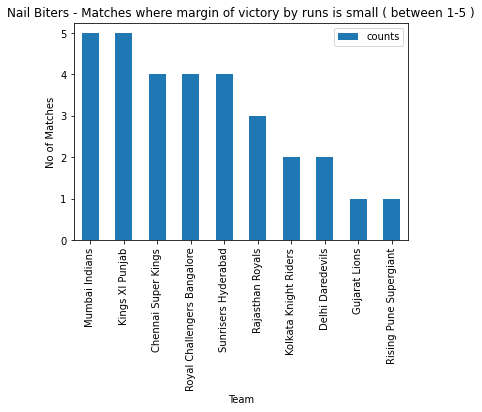

In [53]:
# 3. What are the smallest margins of victory by runs? (Close Matches)
# filter matches where margin of victory by runs is small ( between 1-5 )
small_win_runs = matches[matches['win_by_runs'].between(1, 5, inclusive = True)]
# count occurence of each team
count_small_win_runs = small_win_runs['winner'].value_counts().rename_axis('winner').reset_index(name='counts')
# plotting matches where margin of victory by runs is small ( between 1-5 )
count_small_win_runs.plot.bar(x='winner', y='counts')
plt.xlabel('Team')
plt.ylabel('No of Matches')
plt.title('Nail Biters - Matches where margin of victory by runs is small ( between 1-5 )')

Text(0.5, 1.0, 'Teams that like to finish it off early')

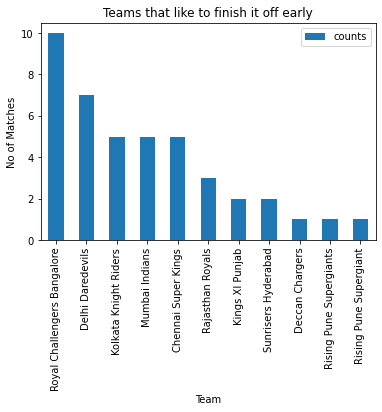

In [55]:
# 4. What are biggest margins of victory by wickets ( between 9-10 )
# filter matches where margin of victory by wickets is large ( between 9-10 )
bid_win_wickets = matches[matches['win_by_wickets'].between(9, 10, inclusive = True)]
# count occurence of each team
count_bid_win_wickets = bid_win_wickets['winner'].value_counts().rename_axis('winner').reset_index(name='counts')
# plotting matches where margin of victory by wickets is large ( between 9-10 )
count_bid_win_wickets.plot.bar(x='winner', y='counts')
plt.xlabel('Team')
plt.ylabel('No of Matches')
plt.title('Teams that like to finish it off early')

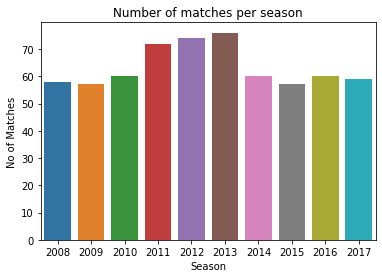

In [56]:
# 5. What are the number of matches per season?
# using seaborn to avoid the need of an explicit group_by and count
sns.countplot(x='season', data=matches)
plt.xlabel('Season')
plt.ylabel('No of Matches')
plt.title('Number of matches per season')
plt.show()

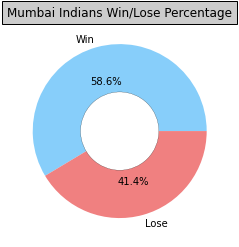

In [57]:
# 6. Calculating success of a team (No of matches won / No of matches played)
# set x = team
x = mi
# calculate total matches played by team
matches_played = len(matches[(matches['team1'] == x) | (matches['team2'] == x)])
# calculate matches won by team
matches_won = len(matches[matches['winner'] == x])
# plot a pie chart
labels = 'Win', 'Lose'
sizes = [matches_won, matches_played - matches_won]
colors = ['lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False)
plt.title(f'{x} Win/Lose Percentage', bbox={'facecolor':'0.8', 'pad':5})        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0.2)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

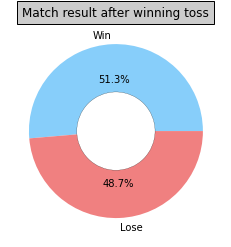

In [58]:
# 7. Does winning the toss give a big advantage?
# calculate total matches played
total_matches_played = len(matches['winner'])
# calculate no of times teams win match after winning toss
toss_match_win = len(matches[matches['toss_winner'] == matches['winner']])
# plot a pie chart for advantage of toss
labels = 'Win', 'Lose'
sizes = [toss_match_win, total_matches_played - toss_match_win]
colors = ['lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False)
plt.title('Match result after winning toss', bbox={'facecolor':'0.8', 'pad':5})        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0.2)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [59]:
# we can see that winning the toss gives a very small advantage contrary to what is generally believed.

Text(0.5, 1.0, 'Most Man of the Match awards')

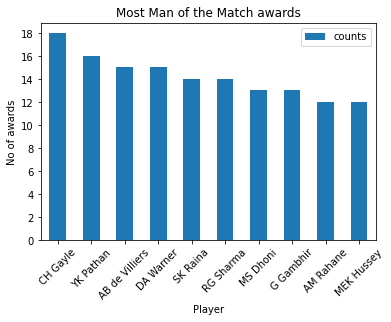

In [60]:
# 8. Which are the players with the most Man of the Match awards?
# count occurence of each player in player_of_match list
pom = matches['player_of_match'].value_counts().rename_axis('player').reset_index(name='counts')[:10]
# plot man of the match awards
pom.plot.bar(x='player', y='counts')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,20,2))
plt.xlabel('Player')
plt.ylabel('No of awards')
plt.title('Most Man of the Match awards')

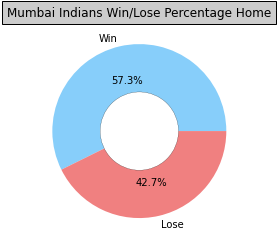

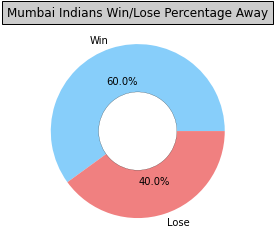

In [61]:
# 9. Calculating a team's Win/Loss percentage in home and away matches

# home matches :
# calculate total home matches played by team
matches_played_home = len(matches[(matches['team1'] == x)])
# calculate home matches won by team
matches_won_home = len(matches[(matches['team1'] == x) & (matches['winner'] == x)])
# plot a pie chart
labels = 'Win', 'Lose'
sizes = [matches_won_home, matches_played_home - matches_won_home]
colors = ['lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False)
plt.title(f'{x} Win/Lose Percentage Home', bbox={'facecolor':'0.8', 'pad':5})       
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0.2)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

# away matches:
# calculate total away matches played by team
matches_played_away = len(matches[(matches['team2'] == x)])
# calculate away matches won by team
matches_won_away = len(matches[(matches['team2'] == x) & (matches['winner'] == x)])
# plot a pie chart
labels = 'Win', 'Lose'
sizes = [matches_won_away, matches_played_away - matches_won_away]
colors = ['lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False)
plt.title(f'{x} Win/Lose Percentage Away', bbox={'facecolor':'0.8', 'pad':5})       
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0.2)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Text(0.5, 1.0, 'Teams Mumbai Indians have played against the most')

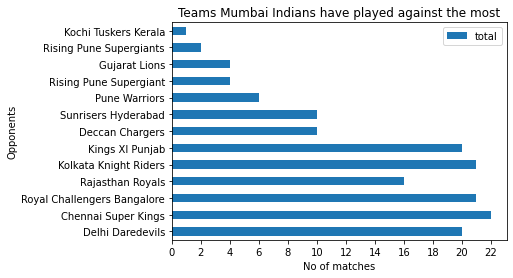

In [63]:
# 10. How many matches has a team played against other teams?
# calculate total away matches played by x
x_t2 = matches[matches['team2'] == x]['team1'].value_counts().rename_axis('teams').reset_index(name='counts')
# calculate total home matches played by x
x_t1 = matches[matches['team1'] == x]['team2'].value_counts().rename_axis('teams').reset_index(name='counts')
# merge both df on teams
teams_vs_x = pd.merge(left=x_t1, right=x_t2, how='left', left_on='teams', right_on='teams')
# set null = 0
teams_vs_x['counts_y'] = teams_vs_x['counts_y'].fillna(0)
# calculate total matches played
sum_column = teams_vs_x["counts_x"] + teams_vs_x["counts_y"]
teams_vs_x["total"] = sum_column
# plot most matches played against
teams_vs_x.plot.barh(x='teams', y='total')
plt.xticks(np.arange(0,24,2))
plt.ylabel('Opponents')
plt.xlabel('No of matches')
plt.title(f'Teams {x} have played against the most')

Text(0.5, 1.0, 'Win/Lose percentages of Mumbai Indians at different grounds')

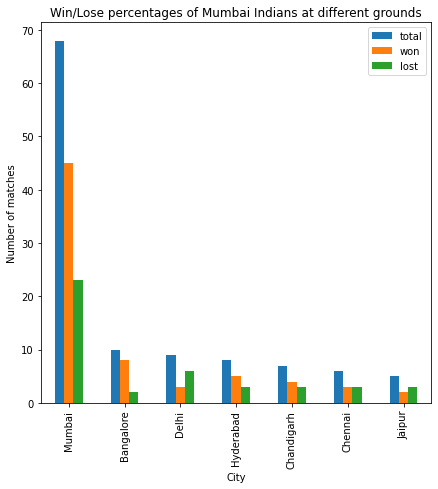

In [67]:
# 11. What are the Win/Lose percentages of a team at different grounds?
# calculate total matches played by a team in a city
city_played = matches[(matches['team1'] == x) | (matches['team2'] == x)]['city'].value_counts().head(10).rename_axis('city').reset_index(name='total')
# calculate total matches won by a team in a city
city_x_won = matches[matches['winner'] == mi]['city'].value_counts().head(10).rename_axis('city').reset_index(name='won')
# calculate total matches lost by a team in a city
city_x_lost = matches[((matches['team1'] == x) | (matches['team2'] == x)) & (matches['winner'] != mi)]['city'].value_counts().head(10).rename_axis('city').reset_index(name='lost')
# merge df
total_played = pd.merge(left=city_played, right=city_x_won, on='city')
total_played = pd.merge(left=total_played, right=city_x_lost, on='city') 
# plot
total_played.plot.bar(x='city', figsize=(7,7))
plt.xlabel('City')
plt.ylabel('Number of matches')
plt.title(f'Win/Lose percentages of {x} at different grounds')

In [68]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
